# **MobileNetV2**

**Load all necessary tools for building the CNN and make sure the environment is using GPU for faster training.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

TensorFlow version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Give the notebook access to the dataset stored in Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Set the path where the face images are stored and verify that data is available.**

In [ ]:
DATA_DIR = "/content/drive/MyDrive/AI_Project/Final_data_split"
!ls "$DATA_DIR"

train  val


**Automatically load images from folders and split them:
90% training — 10% validation.**

In [ ]:
IMG_SIZE = (224, 224)

TRAIN_DIR = "/content/drive/MyDrive/AI_Project/Final_data_split/train"
VAL_DIR   = "/content/drive/MyDrive/AI_Project/Final_data_split/val"

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    seed=42,
    image_size=IMG_SIZE,
    batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    seed=42,
    image_size=IMG_SIZE,
    batch_size=64
)

class_names = train_ds.class_names
print(class_names)
print("Number of classes:", len(class_names))

Found 1688 files belonging to 50 classes.
Found 422 files belonging to 50 classes.
['n000001', 'n000004', 'n000006', 'n000008', 'n000009', 'n000010', 'n000026', 'n000028', 'n000029', 'n000030', 'n000037', 'n000038', 'n000040', 'n000043', 'n000047', 'n000052', 'n000054', 'n000056', 'n000065', 'n000067', 'n000069', 'n000071', 'n000077', 'n000079', 'n000082', 'n000083', 'n000090', 'n000091', 'n000092', 'n000093', 'n000094', 'n000103', 'n000106', 'n000107', 'n000114', 'n000115', 'n000116', 'n000117', 'n000118', 'n000120', 'n000122', 'n000141', 'n000148', 'n000149', 'n000150', 'n000151', 'n000160', 'n000167', 'n000169', 'n000171']
Number of classes: 50


**Print the people names (labels) and speed up training with prefetching.**

In [ ]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['n000001', 'n000004', 'n000006', 'n000008', 'n000009', 'n000010', 'n000026', 'n000028', 'n000029', 'n000030', 'n000037', 'n000038', 'n000040', 'n000043', 'n000047', 'n000052', 'n000054', 'n000056', 'n000065', 'n000067', 'n000069', 'n000071', 'n000077', 'n000079', 'n000082', 'n000083', 'n000090', 'n000091', 'n000092', 'n000093', 'n000094', 'n000103', 'n000106', 'n000107', 'n000114', 'n000115', 'n000116', 'n000117', 'n000118', 'n000120', 'n000122', 'n000141', 'n000148', 'n000149', 'n000150', 'n000151', 'n000160', 'n000167', 'n000169', 'n000171']
50


**# دي عشان تحسين الاداء الداخلي مش اكتر ف مش مستنيه منه Output**

In [ ]:

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

**Use pretrained MobileNetV2 to extract face features and add custom classification layers for our dataset.**

In [ ]:
# Cell 5: بناء MobileNetV2 كـ Feature Extractor + طبقات التصنيف

num_classes = len(class_names)

base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE + (3,))

x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,428,402 (9.26 MB)

 Trainable params: 170,418 (665.70 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Train the neural network on our face dataset and measure performance improvements per epoch.**

In [ ]:
# Cell 6: تجميع الموديل (compile) والتدريب (fit)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 709s 26s/step - accuracy: 0.0350 - loss: 3.9779 - val_accuracy: 0.1232 - val_loss: 3.4301
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.1960 - loss: 3.1421 - val_accuracy: 0.1967 - val_loss: 3.0291
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.3750 - loss: 2.5491 - val_accuracy: 0.2844 - val_loss: 2.7488
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.5084 - loss: 2.0589 - val_accuracy: 0.3081 - val_loss: 2.5782
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5827 - loss: 1.7260 - val_accuracy: 0.3602 - val_loss: 2.4046
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.6877 - loss: 1.3908 - val_accuracy: 0.4052 - val_loss: 2.3078
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.7632 - loss: 1.1527 - val_accuracy: 0.4384 - val_loss: 2.2347
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.8035 - loss: 0.9600 - val_accuracy: 0.

**Visualize learning performance to detect improvement or overfitting.**

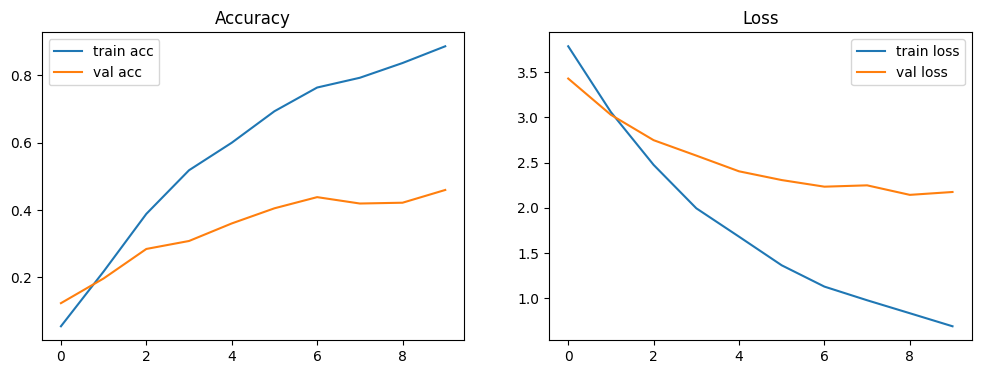

In [ ]:
# Cell 7: دالة لرسم الدقة والخسارة للتدريب

def plot_history(history):
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)

**Measure the generalization accuracy of the model on unseen data.**

In [ ]:
# Cell 8: تقييم الموديل على الـ Validation أو جزء من البيانات

val_loss, val_acc = model.evaluate(val_ds)
print("Validation accuracy:", val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.4477 - loss: 2.1325
Validation accuracy: 0.4597156345844269


**Export the model file so the GUI team can load it and test it in the final application.**

In [ ]:
# Cell 9: حفظ الموديل في ملف .h5 لاستخدامه في الـ GUI

model.save("mobilenet_faces.h5")
print("Model saved as mobilenet_faces.h5")

Model saved as mobilenet_faces.h5
